In [1]:
# ~~~~~~~~~~~~~~~~
# PyTorch Model

import torch
import yaml
from models.decoder import architectures

with open("models/decoder/decoder_params.yaml") as file:
    params = yaml.safe_load(file)

decoder = architectures.LightningDecoderNet(params["inner_dims"], params["seq_len"], params["learning_rate"])
decoder.load_state_dict(torch.load("models/decoder/decoder.pth"))
decoder.eval();

#model_denoise = architectures.LightningNet(params["inner_dims"], params["seq_len"], params["learning_rate"])
#model_denoise.load_state_dict(torch.load("models/decoder/decoder_denoise.pth"))
#model_denoise.eval();

# ~~~~~~~~~~~~~~~~
# Kernel DM+V

from models.kernel_dmv.my_kernel_dmv import KernelDMV
kdm = KernelDMV()

# ~~~~~~~~~~~~~~~~
# GMRF

from models.gmrf.my_gmrf import myGMRF
gmrf = myGMRF()

In [2]:
from torch.utils import data
from data.gdm_dataset import GasDataSet

dataset = GasDataSet("data/30x25_multipleSources/test.pt")
loader = data.DataLoader(dataset, batch_size=1, shuffle=True, drop_last=True)
data_iter = iter(loader)

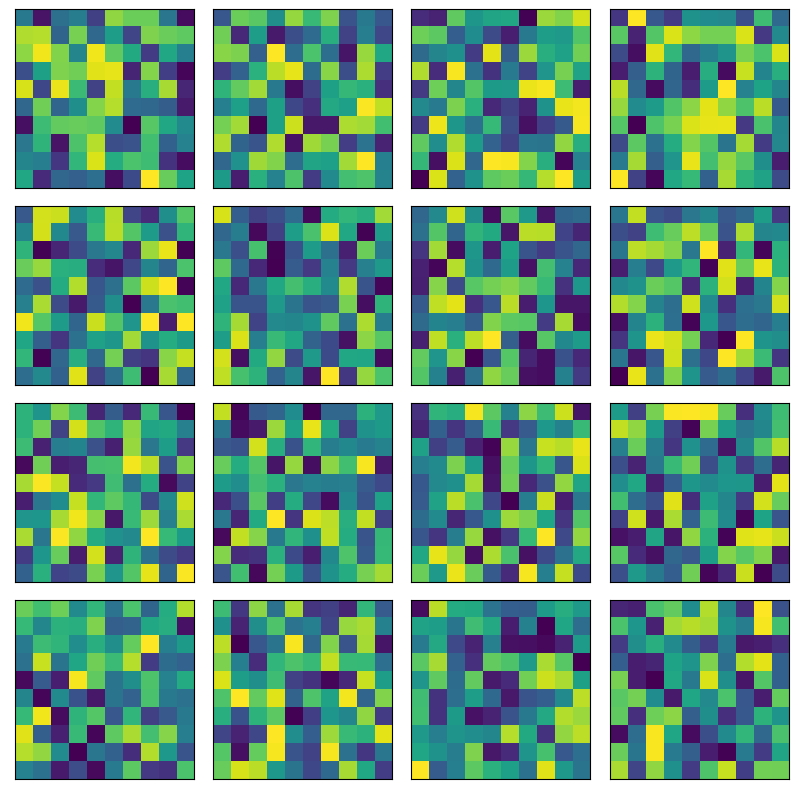

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Create a 4x4 subplot grid
fig, axs = plt.subplots(4, 4, figsize=(10, 10))#, sharex=True, sharey=True)

# Set the horizontal and vertical spacing between the subplots
fig.subplots_adjust(hspace=0.1, wspace=0.1)

# Plot something in each subplot
for i in range(4):
    for j in range(4):
        axs[i, j].imshow(np.random.rand(10, 10))
        axs[i, j].xaxis.set_visible(False)
        axs[i, j].yaxis.set_visible(False)

# Show the plot
plt.show()


In [13]:
import matplotlib.pyplot as plt
from utils import plot_gdm, draw_random_samples

def plot_dict(input_dict, figsize, cbar_base_col=0, dpi=None):
    """ Plots the input of a dict. The dict should contain GDM data.
    
    Input:
    input_dict: ...
    figsize: ... (automatically in the future?)
    cbar_base_col: Which col should be used as baseline vmin and vmax of plt.imshow.
    """
    
    rows = len(next(iter(input_dict.values())))
    cols = len(input_dict)

    # Create subplot grid
    fig, axes = plt.subplots(rows, len(input_dict), figsize=figsize, dpi=dpi)#, sharex=True, sharey=True)  
    
    # Set the horizontal and vertical spacing between the subplots
    fig.subplots_adjust(hspace=0.05, wspace=0.02)
    
    # Loop over rows (amount of samples)
    for row in range(rows):
        vmin=None
        vmax=None

        vmin = input_dict[list(input_dict.keys())[cbar_base_col]][row].min()
        vmax = input_dict[list(input_dict.keys())[cbar_base_col]][row].max()   
        
        # Loop over cols (amount of models)
        for col_key, col in zip(input_dict, range(cols)):
            """try:
                # Try for multiple rows
                plot_gdm(input_dict[col][row].squeeze(), axes[row][i], vmin=vmin, vmax=vmax);
                if row == 0:
                    axes[row][i].set_title(col)
        
            except:
                # otherwise only single row
                plot_gdm(input_dict[col][row].squeeze(), axes[i], vmin=vmin, vmax=vmax);
                if row == 0:
                    axes[i].set_title(col)
            """
            axes[row,col].imshow(input_dict[col_key][row].squeeze().detach().numpy(), vmin=vmin, vmax=vmax)
            axes[row,col].axis("off")
            if row == 0:
                    axes[row][col].set_title(col_key)

    return fig, axes

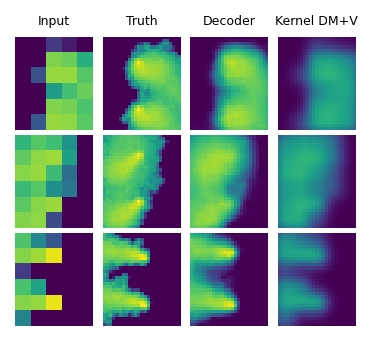

In [33]:
#from utils import plot_dict, draw_random_samples

X_list, y_list = draw_random_samples(3, dataset)
    
data = {
        "Input": X_list,
        "Truth": y_list,
        "Decoder": [decoder(x.squeeze(1)) for x in X_list],
        "Kernel DM+V": [kdm.calculate(x.squeeze()) for x in X_list],
        }


fig, axes = plot_dict(data, [3,2.5], 1, dpi=150);

### Paper visualization

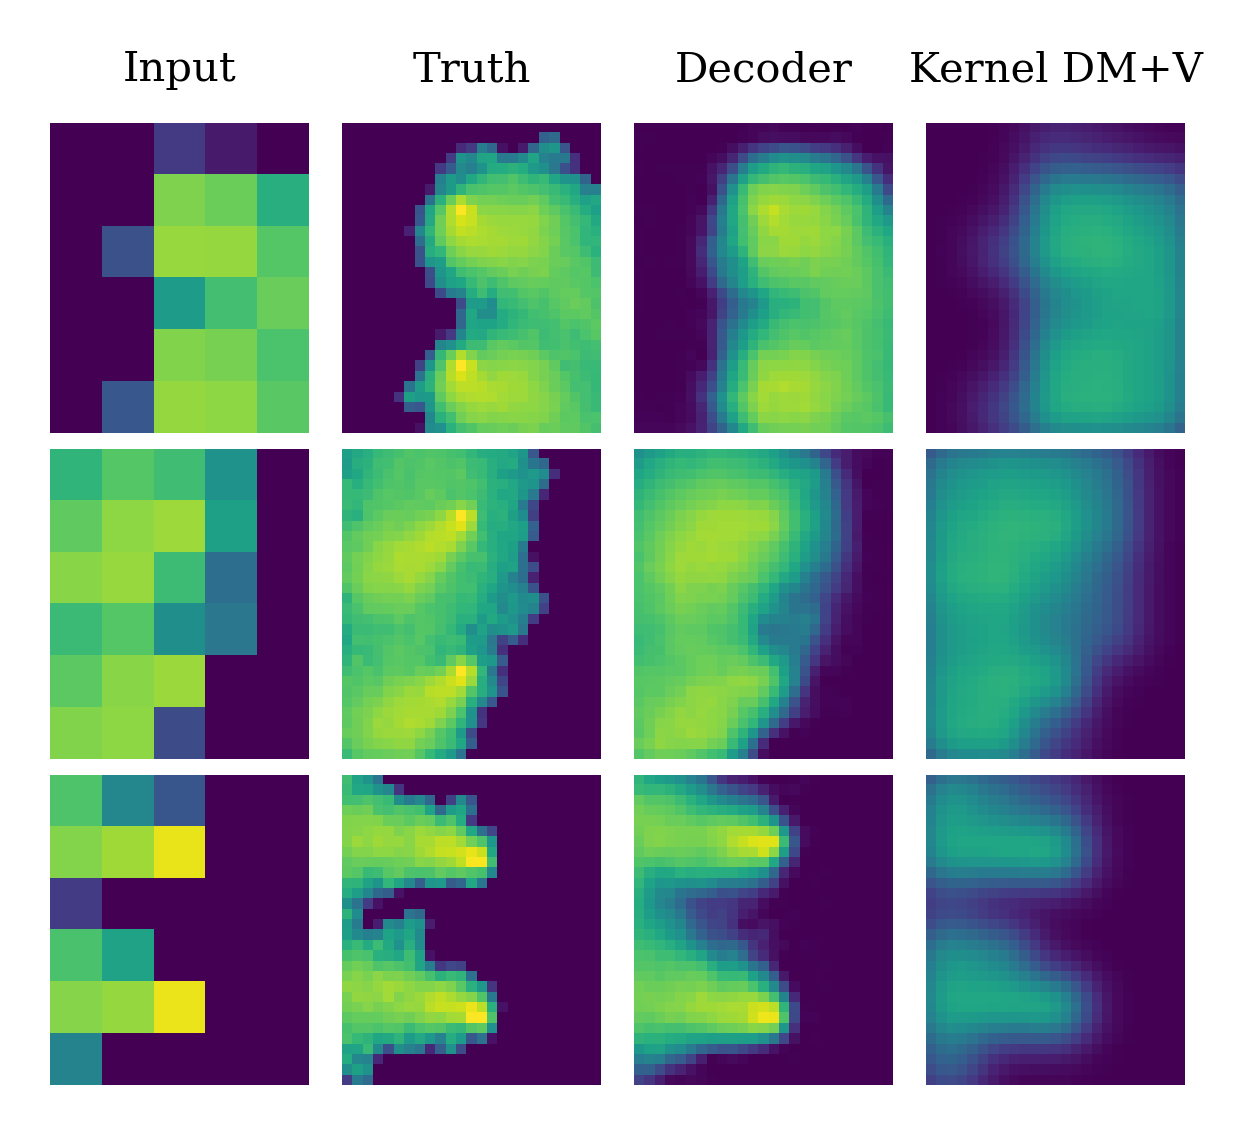

In [34]:
import matplotlib.gridspec as gridspec
import matplotlib as mpl

#mpl.use("pgf")
#%matplotlib inline 
mpl.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'font.size' : '5',
    #'text.usetex': True,
    'pgf.rcfonts': False,
})


fig, axes = plot_dict(data, [3,2.5], 1, dpi=500);
plt.savefig("pgf/multisource/multisource.pgf", bbox_inches='tight', facecolor="w", pad_inches=0, dpi=500)